## Homework #4

##### Author: [Radoslav Neychev](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [3]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Task #1: 
Let's turn to the classic problem of handwritten digit recognition. We will be working with the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. In this task, we will use the entire dataset as a whole.

__Your main task is to implement the entire model training pipeline and achieve an accuracy of $\geq 92\%$ on the test set.__

The code for training the model is missing in this task. There are only a few tests that will help you debug your solution. For an example, you can refer to the notebook from the first lesson.

We strongly recommend writing the code "from scratch," only glancing at ready-made examples, rather than just "copy-pasting". This will help you in the future.

100.0%
100.0%
100.0%
100.0%


Text(0.5, 1.0, 'Image label: 4')

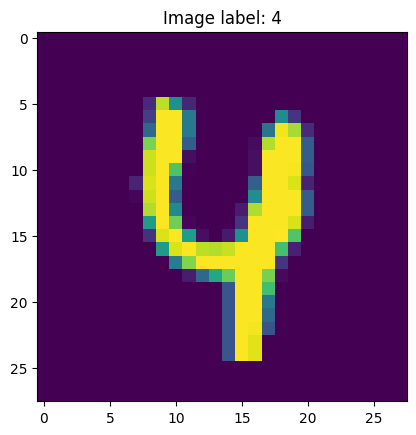

In [4]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Build the model below. Please do not construct an overly complicated network; it should not be deeper than four layers (it can be less). Your main task is to train the model and achieve at least 92% accuracy on the test set (hold-out set).

*Note: Linear layers and activation functions should suffice.*

__Keep in mind, your model should be represented by the variable `model`__

In [10]:
# Creating model instance
import torch.optim as optim

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1) 
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = Model()


Local tests for checking your model are available below:

In [11]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Train your model on the training set. We recommend experimenting with different optimizers.

In [20]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_data_loader):
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_data_loader):.4f}")

model.eval() 
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_data_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Final Accuracy on Test Set: {accuracy:.2f}%')

Epoch [1/10], Loss: 0.0404
Epoch [2/10], Loss: 0.0318
Epoch [3/10], Loss: 0.0253
Epoch [4/10], Loss: 0.0201
Epoch [5/10], Loss: 0.0166
Epoch [6/10], Loss: 0.0147
Epoch [7/10], Loss: 0.0122
Epoch [8/10], Loss: 0.0109
Epoch [9/10], Loss: 0.0082
Epoch [10/10], Loss: 0.0077
Final Accuracy on Test Set: 97.80%


Also, remember that you can always refer to the excellent [documentation](https://pytorch.org/docs/stable/index.html) and [tutorials](https://pytorch.org/tutorials/).

Let's evaluate the classification quality:

In [13]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [14]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.98967


In [15]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [16]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.978


Check that the necessary thresholds are passed:

In [17]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

### Submitting the Assignment
Upload the file `hw04_data_dict.npy` (link is below) and run the code below to generate your submission.

In [18]:
!wget https://github.com/girafe-ai/ml-course/blob/26s_harbour/homeworks/hw004_mnist_classification/hw04_data_dict.npy

zsh:1: command not found: wget


In [19]:
# do not change the code in the block below
# __________start of block__________
import os
import json
assert os.path.exists('hw04_data_dict.npy'), 'Please, download `hw04_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels).numpy()
    predicted_labels = ','.join([str(x) for x in list(predicted_labels)])
    return predicted_labels

loaded_data_dict = np.load('hw04_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test']))
}

with open('submission_dict_hw04.json', 'w') as iofile:
    json.dump(submission_dict, iofile)
print('File saved to `submission_dict_hw04.json`')
# __________end of block__________

File saved to `submission_dict_hw04.json`


With that, the task is complete. Congratulations!